# Analítica de datos
# Examen parcial 1
# 2019-02

# <font color='red'> Julio Cesar Gaviria Jaramillo, A00305816 </font>

# <font color='red'>ENTREGA PRIMERA PARTE</font> - <font color='blue'> EN CLASE </font>

Usted es el encargado de analítica de una empresa de telefonía celular y tiene que proporcionar soluciones para hacer frente a las problemáticas de un sector que ha llegado a saturación del mercado. Tanto su empresa como sus competidores directos tienen que disputarse por una base de clientes limitada, de tal forma que usted tiene que responder a un objetivo estratégico definido por la dirección así:  

    "Mantener y fidelizar a nuestros clientes por medio de un servicio de calidad que se adapte a sus necesidades particulares."
    
Su compañía dispone de una base de datos histórica de personas que hace un año eran clientes propios. Algunos de esos clientes siguen siéndolo hoy en día, otros ya no lo son. La idea es podeer identificar los clientes que son propensos a dejar la compañía, para poder pensar en programas de fidelización preventivos.

Los campos del dataset son los siguientes:
1.  ID: Código identificador de los clientes de la compañía de telefonía móvil
1.	ESTADO: Describe si el usuario sigue con la compañía (VINCULADO) o no (RETIRADO)
1.	INGRESOS: Promedio de ingresos del cliente en pesos
1.	CASA: Precio de la casa en la que vive el cliente en pesos
1.	PRECIO_DISPOSITIVO: Precio del celular del cliente en pesos
1.  GÉNERO: "Hombre" o "Mujer"
1.	MESES: Antigüedad del usuario en meses
1.	DURACION: Promedio de duración de las llamadas hechas por el cliente en minutos
1.	SOBRECARGO: Promedio de minutos que se sobrepasa el usuario en un mes
1.	SALDO_RESTANTE: Promedio de minutos de su plan que le quedan al usuario sin utilizar cada mes
1.	SATISFACCION: nivel de satisfacción del usuario de 0 a 10 (muy satisfecho), obtenido a partir de una encuesta.

La idea es poder predecir el ESTADO a partir de las otras variables, utilizando modelos de aprendizaje supervisado (KNN, NaiveBayes, y regresión logística).

# 1. Entendimiento de los datos, limpieza

El archivo "DatosTelco.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

Tenga en cuenta lo siguiente: 
- para modificar ciertos valores de un dataframe, se utiliza "df.replace('oldvalue', 'newvalue')", si se trata de un valor NaN, se utiliza *np.nan* (ya sea el oldvalue o el newvalue)
- para cambiar un tipo de dato a numérico en una estructura de pandas, se utiliza su método ".astype('float64')"
- para negar una condición en python se utiliza el símbolo "~"
- para obtener una tabla de frecuencias de los registros (filas) con respecto al valor de una variable categórica se utiliza "pd.crosstab(index=df['var'], columns="conteo")
- para cambiar los valores de una columna en un dataframe con condiciones, utilizar "df.loc[condicion, 'columna']=newVal"
- cuando haya atributos con demasiados valores faltantes, pueden eliminar la columna correspondiente.
- cuando haya atributos con unos pocos valores faltantes, pueden eliminar los registros correspondientes.
- cuando el número de valores faltantes de un atributo no sea tan elevado, pero si sea considerable, pueden reemplazar los valores faltantes:
  - Si se trata de una variable categórica, pueden crear un nuevo valor, o reemplazar por la categoría más común
  - Si se trata de una variable numérica, pueden reemplazar por el promedio de los valores presentes del atributo
- cuando se quiere ordenar un dataframe por los valores de una columna se usa "df.sort_values("COLUMNA", ascending=True)"
- para borrar los registros a partir de un índice de fila se utiliza "df.drop([0,3])"
- para borrar los registros a partir de una condición se utiliza "df = df[df.edad<99]"
- para borrar una columna por nombre se utiliza --> df = df.drop('columna',axis=1) 

# Puntos a desarrollar

DURANTE EL EXAMEN, EN CLASE: 
1. <font color='red'>Carguen el archivo en memoria y exploren los datos. Antes de hacer limpieza identifiquen, el baseline global (0.1) y los baselines por GÉNERO (0.2).
   ¿A primera vista, solo considerando el género, cree que es una buena idea crear un modelo predictivo de la deserción de hombres y de mujeres de manera separada? (0.2).</font>
2. <font color='red'>Identifiquen los problemas e inconsistencias que tienen los datos, teniendo en cuenta el diccionario de datos y el contexto del problema. Limpien los datos, argumentando las razones de cada transformación o eliminación de datos.
(1.1). </font>

EN CASA, PARA ENTREGAR: 
3. <font color='red'>Para arreglar un problema existente en la variable CASA: (1.0)
    * utilice un modelo de regresión lineal (use el modelo sklearn.linear_model.LinearRegression, no use statsmodels)
    * considere solo las demas variables NUMÉRICAS como variables predictivas
    * cree el mejor modelo que utilice 1 solo variable, calcule el R2 ajustado e interprételo
    * utilice holdout (70/30) como protocolo de evaluación
</font>

# 1.1 Carga y baselines pre-limpieza de datos

In [415]:
import warnings
warnings.filterwarnings('always') 

In [416]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score,cross_validate #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [417]:
d = pd.read_csv("DatosTelco.csv", delimiter = ";")

In [418]:
valoresCasa = d.CASA

In [419]:
d.head()

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,VINCULADO,4074840,6.878215e+08,1444153.0,Mujer,26,2.3,11.167542,20.3,1.762872
1,2,VINCULADO,8574088,1.349120e+09,2157661.0,Hombre,23,3.7,0.000000,53.5,3.361266
2,3,RETIRADO,795993,1.326558e+08,452809.0,Mujer,38,16.8,350.610224,13.9,8.359438
3,4,RETIRADO,8115015,1.290405e+09,2617184.0,Mujer,37,17.6,230.913888,45.7,8.964017
4,5,RETIRADO,8187499,1.305348e+09,666069.0,Mujer,19,0.0,131.541983,67.2,8.808206


In [420]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 11 columns):
ID                    23162 non-null int64
ESTADO                23157 non-null object
INGRESOS              23162 non-null int64
CASA                  23062 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
GENERO                23162 non-null object
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23159 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.9+ MB


---

# <font color="GREEN">Baseline GLOBAL</font>

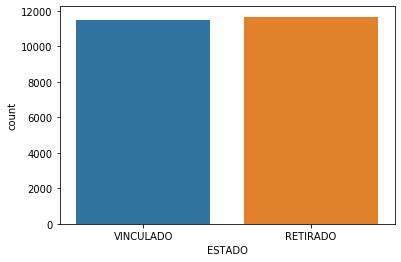

In [421]:
ax = sns.countplot(x="ESTADO",data=d)

In [422]:
pd.crosstab(index=d["ESTADO"],columns="count").T

ESTADO,RETIRADO,VINCULADO
col_0,,
count,11660,11497


In [423]:
d.ESTADO.shape[0]

23162

**De lo anterior podemos decir que nuestro baseline sera escoger los RETIRADOS con un % del 50,3%** "

---

---

# <font color="GREEN">Baseline x GENERO</font>

In [424]:
d.GENERO.count()

23162

---

#### **PARA LOS HOMBRES...**

In [425]:
hombres = d.loc[(d.GENERO == "Hombre")]

In [426]:
hombres.shape[0]

11647

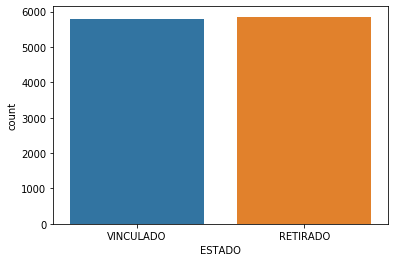

In [427]:
ax = sns.countplot(x="ESTADO",data=hombres)

In [428]:
pd.crosstab(index=hombres["ESTADO"],columns="count").T

ESTADO,RETIRADO,VINCULADO
col_0,,
count,5854,5791


**El BASELINE en el caso de los HOMBRES seria escoger los RETIRADOS con un % del 50,2%**

---

---

#### **PARA LAS MUJERES ...**

In [429]:
mujeres = d.loc[(d.GENERO == "Mujer")]

In [430]:
mujeres.shape[0]

11515

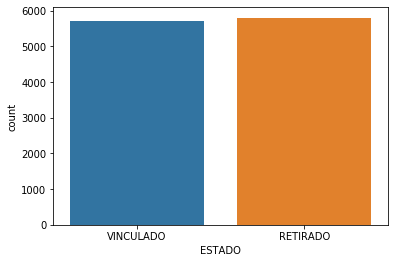

In [431]:
ax = sns.countplot(x="ESTADO",data=mujeres)

In [432]:
pd.crosstab(index=mujeres["ESTADO"],columns="count").T

ESTADO,RETIRADO,VINCULADO
col_0,,
count,5806,5706


**El BASELINE en el caso de las MUJERES seria escoger los RETIRADOS con un % del 50,4%**

---

---

# <font color="RED">CONCLUSION</font>

Personalmente creeria que si, ya que los hombres pueden tener gustos o caracteristicas diferentes a las mujeres, en cuanto a las razones del porque se han desvinculado de la compañia telefonica

Ademas, puede que alguno de los 2 generos se deje tentar mucho mas facil por ofertas de otras compañias, o incluso, que perciba la atención en cuanto a servicio al cliente de diferentes maneras

En suma a lo anterior, nos puede permitir como compañia que logremos generar ofertas o planes hacia un genero en especifico, de tal forma que logremos disminuir la cantidad de RETIRADOS

# 1.2 Análisis de los problemas de calidad de datos

In [433]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 11 columns):
ID                    23162 non-null int64
ESTADO                23157 non-null object
INGRESOS              23162 non-null int64
CASA                  23062 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
GENERO                23162 non-null object
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23159 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.9+ MB


In [434]:
d.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,23162,NaN,NaN,NaN,11581.5,6686.44,1,5791.25,11581.5,17371.8,23162
ESTADO,23157,2,RETIRADO,11660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INGRESOS,23162,NaN,NaN,NaN,4.81312e+06,2.73737e+06,150000,2.1563e+06,6.13755e+06,7.34718e+06,9.65e+06
CASA,23062,NaN,NaN,NaN,7.82357e+08,5.54003e+08,-1.77904e+07,3.66068e+08,9.70326e+08,1.17195e+09,4.66442e+10
PRECIO_DISPOSITIVO,23162,NaN,NaN,NaN,1.45478e+06,1.42759e+07,169.338,657184,1.23754e+06,1.82975e+06,1.85936e+09
GENERO,23162,2,Hombre,11647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MESES,23162,NaN,NaN,NaN,23.8626,14.8169,-55,14,24,34,79
DURACION,23162,NaN,NaN,NaN,9.60985,7.04001,0,2.1,14.6,16.1,20.1
SOBRECARGO,23159,NaN,NaN,NaN,110.05,100.769,0,12.569,75.3791,201.53,411.168
SALDO_RESTANTE,23162,NaN,NaN,NaN,42.9919,30.2045,0,15.2,37.65,70,130.7


Recordemos cuantos registros deberian haber:

In [435]:
d.shape[0]

23162

In [436]:
d.loc[d.ESTADO.isna()].shape[0]

5

In [437]:
d.loc[d.CASA.isna()].shape[0]

100

In [438]:
d.loc[d.SOBRECARGO.isna()].shape[0]

3

procedemos a borrar los NA correspondientes:

In [439]:
d = d[~d.ESTADO.isna()]

In [440]:
d = d[~d.CASA.isna()]

In [441]:
d = d[~d.SOBRECARGO.isna()]

In [442]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23054 entries, 0 to 23161
Data columns (total 11 columns):
ID                    23054 non-null int64
ESTADO                23054 non-null object
INGRESOS              23054 non-null int64
CASA                  23054 non-null float64
PRECIO_DISPOSITIVO    23054 non-null float64
GENERO                23054 non-null object
MESES                 23054 non-null int64
DURACION              23054 non-null float64
SOBRECARGO            23054 non-null float64
SALDO_RESTANTE        23054 non-null float64
SATISFACCION          23054 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.1+ MB


In [443]:
d.loc[d.columns.isna()]

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION


---

# DESPUES DE LA ENTREGA ...

### Busqueda de valores negativos

Hay algunas columnas en las cuales se puede identificar valores negativos en sus **MIN**, por ende, vamos a listar el numero de registros con este defecto con el fin de evaluar el paso a seguir:

In [444]:
d.loc[d.CASA < 0].shape[0]

20

In [445]:
d.loc[d.MESES < 0].shape[0]

153

Como son tan pocos registros, los convertiremos a NaN y procederemos a borrarlos

In [446]:
d = d[~(d['CASA'] < 0)]

In [447]:
d = d[~(d['MESES'] < 0)]

In [448]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22881 entries, 0 to 23161
Data columns (total 11 columns):
ID                    22881 non-null int64
ESTADO                22881 non-null object
INGRESOS              22881 non-null int64
CASA                  22881 non-null float64
PRECIO_DISPOSITIVO    22881 non-null float64
GENERO                22881 non-null object
MESES                 22881 non-null int64
DURACION              22881 non-null float64
SOBRECARGO            22881 non-null float64
SALDO_RESTANTE        22881 non-null float64
SATISFACCION          22881 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.1+ MB


---

# Busqueda de valores atipicos

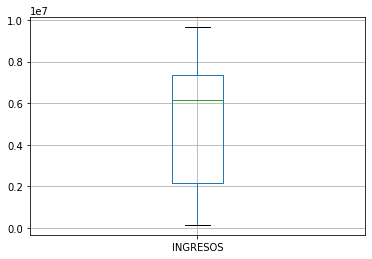

In [449]:
Ibx = d.boxplot(column='INGRESOS');

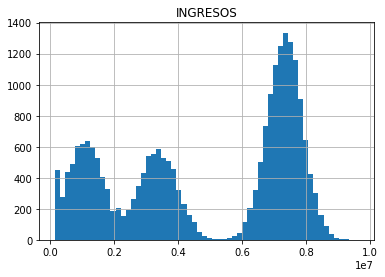

<Figure size 432x288 with 0 Axes>

In [450]:
plt.title('INGRESOS')
plt.hist(d.INGRESOS, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

---

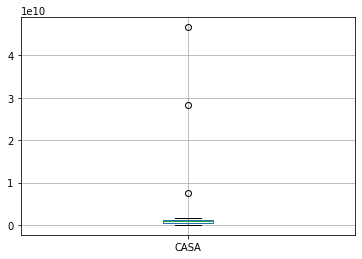

In [451]:
Cbx = d.boxplot(column='CASA');

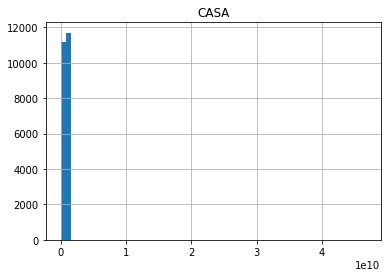

<Figure size 432x288 with 0 Axes>

In [452]:
plt.title('CASA')
plt.hist(d.CASA, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

De aqui se justifica buscar y borrar los 3 valores que presentan anomalias, ya que estos para un valor de casa son muy exagerados

In [453]:
values = d.iloc[d['CASA'].argsort()[-3:]]
values

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
11118,11119,RETIRADO,2248109,7.633591e+09,2.931000e+08,Mujer,0,16.1,190.32510,16.7,8.337312
18828,18829,VINCULADO,7865640,2.825605e+10,1.083085e+09,Hombre,30,17.0,50.81118,90.5,2.443531
21377,21378,RETIRADO,953506,4.664422e+10,1.859365e+09,Mujer,9,15.2,13.48439,23.0,2.551827


In [454]:
maxx =values.CASA.values[0]
maxx

7633591260.0

In [455]:
d.loc[d.CASA >= maxx ].shape[0]

3

In [456]:
d = d[d.CASA < maxx]
d.shape[0]

22878

Verificamos que el boxplot ha quedado sin anomalias

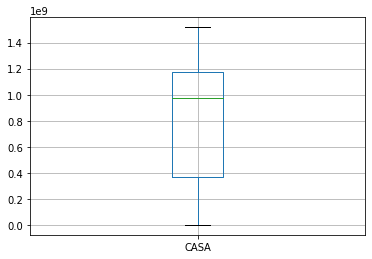

In [457]:
Cbx = d.boxplot(column='CASA');

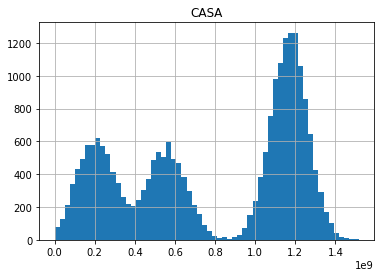

<Figure size 432x288 with 0 Axes>

In [458]:
plt.title('CASA')
plt.hist(d.CASA, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

---

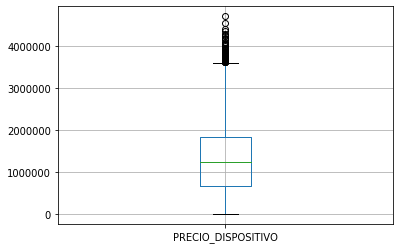

In [459]:
PDbx = d.boxplot(column='PRECIO_DISPOSITIVO');

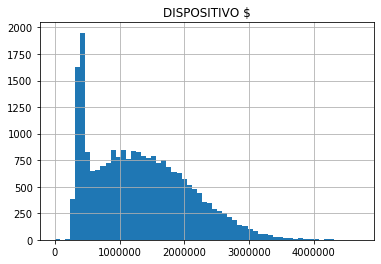

<Figure size 432x288 with 0 Axes>

In [460]:
plt.title('DISPOSITIVO $')
plt.hist(d.PRECIO_DISPOSITIVO, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

De aqui se justifica buscar y borrar los 3 valores que presentan anomalias, ya que estos para un valor de dispositivos son muy exagerados

In [461]:
#values = d.iloc[d['PRECIO_DISPOSITIVO'].argsort()[-3:]]
#values

In [462]:
#maxx =values.PRECIO_DISPOSITIVO.values[0]
#maxx

In [463]:
#d = d[d.PRECIO_DISPOSITIVO < maxx]
#d.shape[0]

In [464]:
#Cbx = d.boxplot(column='PRECIO_DISPOSITIVO');

In [465]:
#plt.title('DISPOSITIVO $')
#plt.hist(d.PRECIO_DISPOSITIVO, bins = 60)
#plt.grid(True)
#plt.show()
#plt.clf()

---

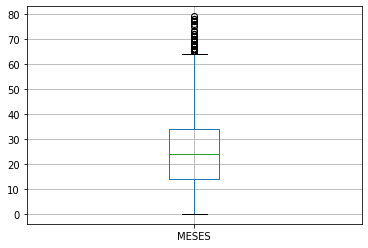

In [466]:
Cbx = d.boxplot(column='MESES');

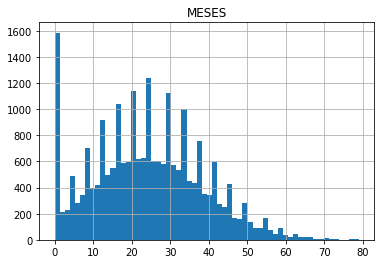

<Figure size 432x288 with 0 Axes>

In [467]:
plt.title('MESES')
plt.hist(d.MESES, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

---

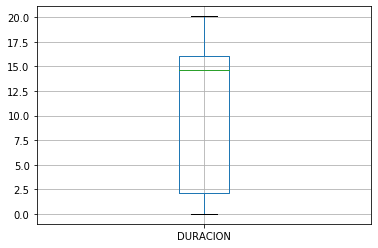

In [468]:
Cbx = d.boxplot(column='DURACION');

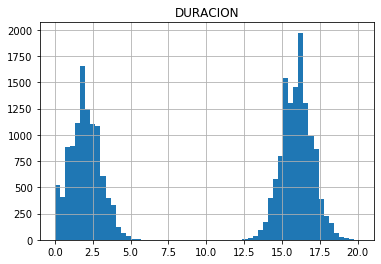

<Figure size 432x288 with 0 Axes>

In [469]:
plt.title('DURACION')
plt.hist(d.DURACION, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

---

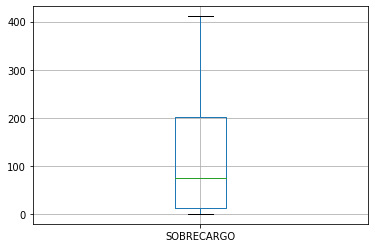

In [470]:
Cbx = d.boxplot(column='SOBRECARGO');

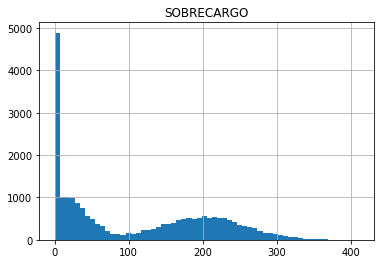

<Figure size 432x288 with 0 Axes>

In [471]:
plt.title('SOBRECARGO')
plt.hist(d.SOBRECARGO, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

---

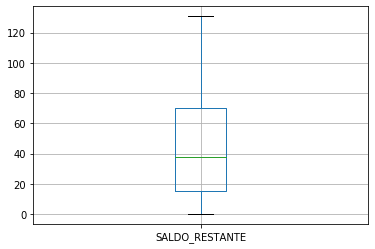

In [472]:
Cbx = d.boxplot(column='SALDO_RESTANTE');

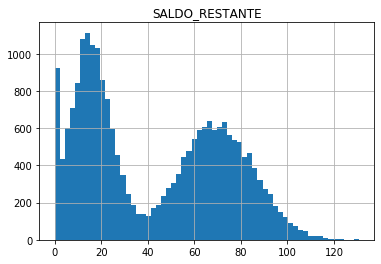

<Figure size 432x288 with 0 Axes>

In [473]:
plt.title('SALDO_RESTANTE')
plt.hist(d.SALDO_RESTANTE, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

---

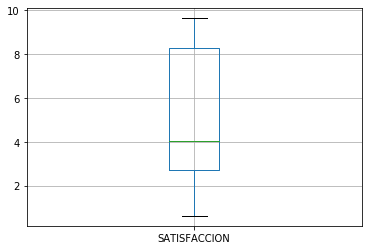

In [474]:
Cbx = d.boxplot(column='SATISFACCION');

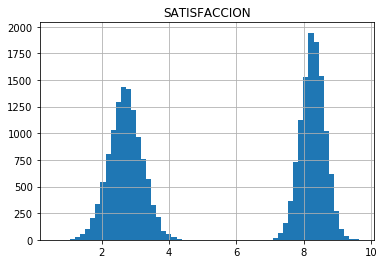

<Figure size 432x288 with 0 Axes>

In [475]:
plt.title('SATISFACCION')
plt.hist(d.SATISFACCION, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

In [476]:
d.columns

Index(['ID', 'ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'GENERO',
       'MESES', 'DURACION', 'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [477]:
dStandard = d.copy()

In [478]:
scaler = preprocessing.StandardScaler()

In [479]:
dStandard[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scaler.fit_transform(dStandard[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

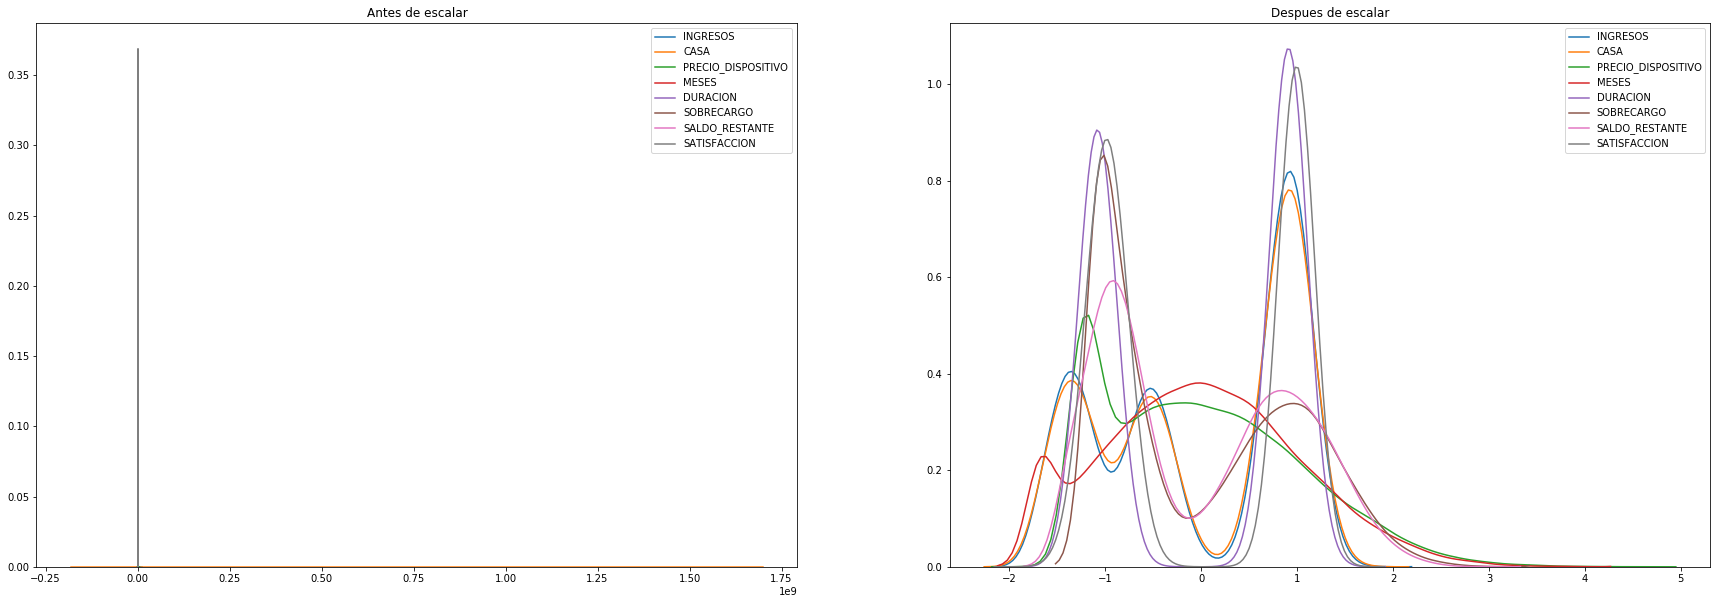

In [480]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize =(30,10))
ax1.set_title("Antes de escalar")
sns.kdeplot(d.INGRESOS, ax = ax1)
sns.kdeplot(d.CASA, ax = ax1)
sns.kdeplot(d.PRECIO_DISPOSITIVO, ax = ax1)
sns.kdeplot(d.MESES, ax = ax1)
sns.kdeplot(d.DURACION, ax = ax1)
sns.kdeplot(d.SOBRECARGO, ax = ax1)
sns.kdeplot(d.SALDO_RESTANTE, ax = ax1)
sns.kdeplot(d.SATISFACCION, ax = ax1)
ax2.set_title("Despues de escalar")
sns.kdeplot(dStandard.INGRESOS, ax = ax2)
sns.kdeplot(dStandard.CASA, ax = ax2)
sns.kdeplot(dStandard.PRECIO_DISPOSITIVO, ax = ax2)
sns.kdeplot(dStandard.MESES, ax = ax2)
sns.kdeplot(dStandard.DURACION, ax = ax2)
sns.kdeplot(dStandard.SOBRECARGO, ax = ax2)
sns.kdeplot(dStandard.SALDO_RESTANTE, ax = ax2)
sns.kdeplot(dStandard.SATISFACCION, ax = ax2)

---

### Resumen de problemas encontrados, acciones tomadas:

1. [**ESTADO**] [Faltan registros]: [Borrar los registros ya que 5/23162 no es tan significativo]
2. [**CASA**] [Faltan registros]: [Borrar los registros ya que 100/23162 no es tan significativo]
3. [**SOBRECARGO**] [Faltan registros]: [Borrar los registros ya que 3/23162 no es tan significativo]
--- Despues de la entrega ---
4. [**CASA**] [Valores negativos]: [Borrar los registros ya que 20/23162 no es tan significativo]
5. [**MESES**] [Valores Negativos]: [Borrar los registros ya que 153/23162 no es tan significativo]
6. [**CASA**] [Anomalias]: [Borrar los registros ya que 3/23162 no es tan significativo]
                    
                    

# <font color='red'>ENTREGA SEGUNDA PARTE</font> - <font color='blue'> POST-CLASE </font>

EN CASA, PARA ENTREGAR: 
3. <font color='red'>Para arreglar un problema existente en la variable CASA: (1.0)
    * utilice un modelo de regresión lineal (use el modelo sklearn.linear_model.LinearRegression, no use statsmodels)
    * considere solo las demas variables NUMÉRICAS como variables predictivas
    * cree el mejor modelo que utilice 1 solo variable, calcule el R2 ajustado e interprételo
    * utilice holdout (70/30) como protocolo de evaluación
</font>

# 1.3 Valores faltantes de CASA: modelo de regresión lineal usando holdout y forward stepwise

In [481]:
d.columns

Index(['ID', 'ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'GENERO',
       'MESES', 'DURACION', 'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

Escogemos las variables cuantitativas mas relevantes a simple vista:

In [482]:
indep_vars = ['INGRESOS', 'SALDO_RESTANTE', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION','SOBRECARGO','SATISFACCION']
dep_vars = ['CASA']

In [483]:
indep_data = dStandard[indep_vars]
dep_data = dStandard[dep_vars]

In [484]:
indep_data.head(2)

,INGRESOS,SALDO_RESTANTE,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SATISFACCION
0,-0.272727,-0.752972,0.170724,0.126835,-1.036115,-0.981011,-1.322572
1,1.372479,0.346128,1.124096,-0.083369,-0.837294,-1.091864,-0.753705


In [485]:
train_x, test_x, train_y, test_y = train_test_split(indep_data, dep_data, test_size=0.3, random_state=42)

In [486]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(16014, 7)
(16014, 1)
(6864, 7)
(6864, 1)


In [487]:
regr = LinearRegression(normalize=True)
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [488]:
for var, coef in zip(indep_vars, np.squeeze(regr.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regr.intercept_)))

INGRESOS: 0.9966916088102203
SALDO_RESTANTE: 0.0010212765575565075
PRECIO_DISPOSITIVO: 0.044164005509759484
MESES: 0.00048710988575397304
DURACION: -0.0004417121109005529
SOBRECARGO: -0.00015040792846612568
SATISFACCION: -0.00020375936664963218
intercepción: -0.0001227392899853289


In [489]:
train_y_pred = regr.predict(train_x)
test_y_pred = regr.predict(test_x)
print(train_y_pred.shape)
print(test_y_pred.shape)

(16014, 1)
(6864, 1)


La **bondad de ajuste** de un modelo estadístico describe lo bien que se ajusta un conjunto de observaciones. Las medidas de bondad en general resumen la discrepancia entre los valores observados y los valores esperados en el modelo de estudio. 

1. **MSE** : Promedio de los errores al cuadrado.
2. **R2** : refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

In [490]:
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))

MSE (train): 0.0046
MSE (test) : 0.0046
R2  (train): 0.9954
R2  (test) : 0.9954


In [491]:
train_x2 = sm.add_constant(train_x)
print(train_x2.head())

       const  INGRESOS  SALDO_RESTANTE  PRECIO_DISPOSITIVO     MESES  \
13798    1.0 -1.420565       -1.060852            0.476869  0.126835   
15495    1.0  0.704471        0.154117           -1.144364 -0.363642   
19002    1.0  0.735283        1.703451            0.457161 -1.484731   
935      1.0 -0.203734       -1.034368            0.576603 -1.694935   
10319    1.0  0.718073        0.220328            0.244036 -1.274527   

       DURACION  SOBRECARGO  SATISFACCION  
13798  0.980503   -0.879229     -0.848774  
15495  1.023108    0.154870      1.120192  
19002 -1.192332    1.554418      1.006954  
935   -0.908301   -1.036398     -1.134818  
10319  0.795883    1.470749      1.221158  


C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jcg

### Statsmodel para pre-visualizacion (solo tomado como ejemplo para analisis futuros)

In [492]:
modeloStats = sm.OLS(train_y, train_x2)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CASA   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.941e+05
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:12:39   Log-Likelihood:                 20347.
No. Observations:               16014   AIC:                        -4.068e+04
Df Residuals:                   16006   BIC:                        -4.062e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0001      0.001     -0.229      0.819      -0.001       0.001
INGRESOS               0.9967      0.001    920.640      0.000       0.995       0.999
SALDO_RESTANTE         0.0010      0.001      0.952      0.341      -0.001       0.003
PRECIO_DISPOSITIVO     0.0442      0.001     82.201      0.000       0.043       0.045
MESES                  0.0005      0.001      0.911      0.362      -0.001       0.002
DURACION              -0.0004      0.001     -0.763      0.445      -0.002       0.001
SOBRECARGO            -0.0002      0.001     -0.127      0.899      -0.002       0.002
SATISFACCION          -0.0002      0.001     -0.173      0.863      -0.003       0.002
==============================================================================
Omnibus:                    14013.249   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.546
Skew:                          -0.003   Prob(JB):                    2.63e-209
Kurtosis:                       1.800   Cond. No.                         4.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PODEMOS CONSIDERAR QUE LAS VARIABLES MAS SIGNIFICATIVAS SON** :

* INGRESOS
* PRECIO_DISPOSITIVO

P < 0,05

<img src="./Resources/Statsmodel.png">

### Interpretación del statsmodel

* **Equilibrado R-cuadrado** refleja el ajuste del modelo. Los valores de R cuadrado varían de 0 a 1, donde un valor más alto generalmente indica un mejor ajuste, suponiendo que se cumplan ciertas condiciones.

* El **coeficiente constante** es su intersección en Y. Significa que si los coeficientes de tasa de interés y tasa de desempleo son cero, entonces la salida esperada (es decir, la Y) sería igual al coeficiente constante.

* El **coeficiente de tasa de interés** representa el cambio en la salida Y debido a un cambio de una unidad en la tasa de interés (todo lo demás se mantuvo constante

* El **coeficiente Unemployment_Rate** representa el cambio en la producción Y debido a un cambio de una unidad en la tasa de desempleo (todo lo demás se mantuvo constante)
std err  refleja el nivel de precisión de los coeficientes. Cuanto más bajo es, mayor es el nivel de precisión

* **P> | t | es el valor de p** . Un valor p de menos de 0.05 se considera estadísticamente significativo

* El **intervalo de confianza** representa el rango en el que es probable que disminuyan nuestros coeficientes (con una probabilidad del 95%)

---

In [493]:
# Calculamos la matriz de correlaciones
corr = train_x.join(train_y).corr()
corr

,INGRESOS,SALDO_RESTANTE,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SATISFACCION,CASA
INGRESOS,1.000000,0.845567,-0.011482,-0.006379,-0.157820,0.001301,0.006688,0.996719
SALDO_RESTANTE,0.845567,1.000000,-0.010102,-0.006058,0.047267,0.008834,0.011265,0.842983
PRECIO_DISPOSITIVO,-0.011482,-0.010102,1.000000,-0.001441,0.007944,0.007012,0.001573,0.032650
MESES,-0.006379,-0.006058,-0.001441,1.000000,0.006755,0.006585,0.005189,-0.005942
DURACION,-0.157820,0.047267,0.007944,0.006755,1.000000,0.004652,0.003414,-0.157277
SOBRECARGO,0.001301,0.008834,0.007012,0.006585,0.004652,1.000000,0.890573,0.001284
SATISFACCION,0.006688,0.011265,0.001573,0.005189,0.003414,0.890573,1.000000,0.006408
CASA,0.996719,0.842983,0.032650,-0.005942,-0.157277,0.001284,0.006408,1.000000


C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\jcgj5\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


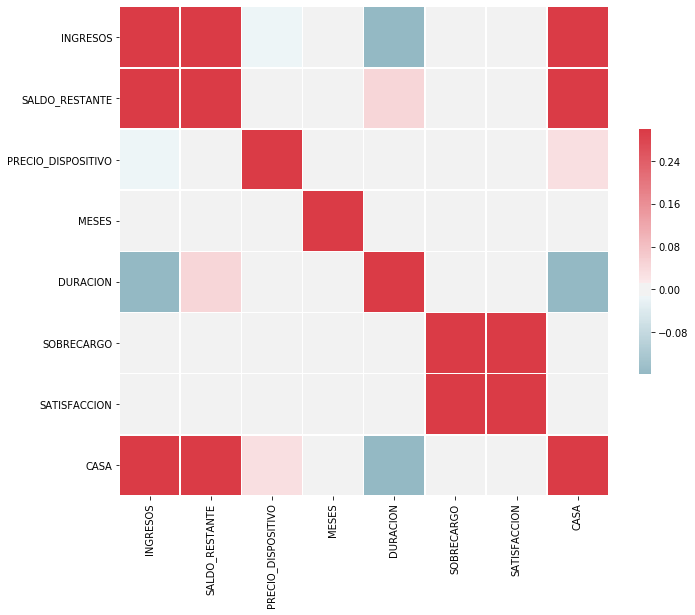

In [494]:
## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Cada cuadrado muestra la correlación entre las variables en cada eje. La correlación varía de -1 a +1. Los valores más cercanos a cero significan que no hay una tendencia lineal entre las dos variables. Cuanto más cerca de 1 sea la correlación, más positivamente están correlacionadas; es decir, a medida que uno aumenta, también lo hace el otro y cuanto más cerca de 1 más fuerte es esta relación. Una correlación más cercana a -1 es similar, pero en lugar de que ambas aumenten, una variable disminuirá a medida que la otra aumenta. Las diagonales son todas 1 / verde oscuro porque esos cuadrados están correlacionando cada variable consigo misma (por lo que es una correlación perfecta). Por lo demás, cuanto mayor sea el número y más oscuro el color, mayor será la correlación entre las dos variables. La gráfica también es simétrica respecto a la diagonal ya que las mismas dos variables se están emparejando juntas en esos cuadrados.

**Sin necesidad del statsmodel, podemos utilizar la grafica anterior para inferir cuales son las mejores variables del modelo, siendo estas INGRESOS, SALDO_RESTANTE**

## <font color="GREEN">FORWARD STEPWISE</font> 

* **Forward**: se prueba una a una con las variables independientes aún no escogidas y se evalúa el modelo conjuntamente con las variables previamente escogidas, escogiendo la mejor. Se para cuando la medida de bondad de ajuste no mejore.
* **Backward**: sigue un proceso contrario al forward, empezando con todas las variables y
eliminando la variable que al no considerarla optimice la medida de bondad de ajuste

In [495]:
dStandard.columns

Index(['ID', 'ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'GENERO',
       'MESES', 'DURACION', 'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [496]:
allVars =['MESES','DURACION','SALDO_RESTANTE','SOBRECARGO','SATISFACCION','INGRESOS','PRECIO_DISPOSITIVO']
#significative_vars = ['INGRESOS','PRECIO_DISPOSITIVO']
dep_data = dStandard['CASA']

Creare un dataframe vacio para irlo llenando :

In [497]:
stepwise =  pd.DataFrame()

In [498]:
#for var in significative_vars:
#    stepwise[var] = dStandard[var]

In [499]:
#stepwise.head(2)

Para calcular el **R2** inicial :

In [500]:
#train_x, test_x, train_y, test_y = train_test_split(stepwise, dep_data, test_size=0.3, random_state=42)

In [501]:
#regr = LinearRegression(normalize=True)
#regr.fit(train_x, train_y)
#test_y_pred = regr.predict(test_x)
#r2 = r2_score(test_y, test_y_pred)      
#print(r2)

In [502]:
r2 = 0
mejorModelo = ""

In [503]:
for columna in allVars:
    stepwise[columna] = dStandard[columna]
    train_x, test_x, train_y, test_y = train_test_split(stepwise, dep_data, test_size=0.3, random_state=42)
    regr = LinearRegression(normalize=True)
    regr.fit(train_x, train_y)
    test_y_pred = regr.predict(test_x)
#   r2_actual = r2_score(test_y, test_y_pred)
    r2_adj= 1- (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_x.shape[1] - 1)
    print("---")
    print("R2_Calculado : " + str(r2_adj))
    if( r2_adj > r2 ):
        mejorModelo = "El mejor modelo es con la variable : " + columna
        r2 = r2_adj
        print("Nuevo R2 : " + str(r2))
    stepwise = stepwise.drop([columna],axis=1)
    print("---")
print(mejorModelo + " con : " + str(r2))

---
R2_Calculado : -0.00018446741534838829
---
---
R2_Calculado : 0.024102781107749327
Nuevo R2 : 0.024102781107749327
---
---
R2_Calculado : 0.7083914556625067
Nuevo R2 : 0.7083914556625067
---
---
R2_Calculado : -0.0002214890391922797
---
---
R2_Calculado : -0.0003080358102180991
---
---
R2_Calculado : 0.9934322323625038
Nuevo R2 : 0.9934322323625038
---
---
R2_Calculado : 0.001194735271718872
---
El mejor modelo es con la variable : INGRESOS con : 0.9934322323625038


Nuestro modelo quedo conformado por :

* **INGRESOS** con el **99,34%**

Lo cual representa un R2 Ajustado bastante bueno, casi apuntando al **100%**

**Nota:** El valor del R2 ajustado corrige el valor del R2 con respecto a la complejidad dada por el número de variables independientes utilizadas, y permite comparar modelos de diferente número de predictores.

---

# 2. Modelos de clasificación

## Puntos a desarrollar:

<font color='red'>El objetivo final es identificar los clientes más propensos a irse de la compañía, con el fin de poder realizar campañas de fidelización. Para tal propósito, se ha decidido buscar el mejor modelo entre **K-NN** y **Naïve Bayes**, pero **solo considerando las variables predictivas numéricas**. </font>

1. <font color='red'> Establezca el **protocolo de evaluación** y la métrica de evaluación más adecuados para la construcción de los modelos de clasificación (0.3)</font>

2. <font color='red'> Construya del mejor modelo **K-NN**, buscando el mejor valor de K (subir hasta un valor de K=25) (1.1)</font>

3. <font color='red'> Construya del mejor modelo **Naïve Bayes** (use la clase GaussianNB), buscando el mejor valor del suavizador de Laplace (var_smoothing) (0.7)</font>

4. <font color='red'> Compárelos (métricas, matriz de confusión), escoja el mejor, y concluya (0.3)</font>

---

---

# 2.1 <font color="BLUE">KNN, NB  y Protocolo de evaluación</font>

Primero cambiare los valores de **ESTADO** de categorica a float donde :

        0 sera VINCULADO
        1 sera RETIRADO

In [504]:
dStandard.loc[(d.ESTADO == "VINCULADO"),"ESTADO"]=0

In [505]:
dStandard.loc[(d.ESTADO == "RETIRADO"),"ESTADO"]=1

Cambiare los valores de **GENERO** a numericos, donde :

        0 sera HOMBRE
        1 sera MUJER
       

In [506]:
dStandard.loc[(d.GENERO == "Hombre"),"GENERO"]=0

In [507]:
dStandard.loc[(d.GENERO == "Mujer"),"GENERO"]=1

In [508]:
dStandardModel = dStandard.copy()

In [509]:
dStandardModel.head()

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,0,-0.272727,-0.217734,0.170724,1,0.126835,-1.036115,-0.981011,-0.752972,-1.322572
1,2,0,1.372479,1.338880,1.124096,0,-0.083369,-0.837294,-1.091864,0.346128,-0.753705
2,3,1,-1.471678,-1.524525,-1.153885,1,0.967652,1.023108,2.388403,-0.964847,1.025138
3,4,1,1.204613,1.200673,1.738099,1,0.897584,1.136720,1.200260,0.087906,1.240307
4,5,1,1.231118,1.235847,-0.868933,1,-0.363642,-1.362751,0.213863,0.799673,1.184854


Borrare el ID, ya que no es una variable significativa

In [510]:
del dStandardModel['ID']

In [511]:
dStandardModel.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,0,-0.272727,-0.217734,0.170724,1,0.126835,-1.036115,-0.981011,-0.752972,-1.322572
1,0,1.372479,1.338880,1.124096,0,-0.083369,-0.837294,-1.091864,0.346128,-0.753705
2,1,-1.471678,-1.524525,-1.153885,1,0.967652,1.023108,2.388403,-0.964847,1.025138
3,1,1.204613,1.200673,1.738099,1,0.897584,1.136720,1.200260,0.087906,1.240307
4,1,1.231118,1.235847,-0.868933,1,-0.363642,-1.362751,0.213863,0.799673,1.184854


---

---

##  <font color="purple">**2.2 ::KNN::**</font>

### **2.2.1 KNN with all Dataset to extract best value of K**

Usaremos el dataset completo para evaluar el modelo **KNN**

In [512]:
x = dStandardModel
y = dStandardModel.ESTADO
#yReshape = dStandardModel.ESTADO.values.reshape(1,-1)

Evaluamos desde k=1 hasta k=25, seleccionando los numeros **impares**

In [513]:
numbers = []
for i in range(1,26):
    if (i%2) != 0:
        numbers.append(i)

In [514]:
numbers

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

In [515]:
for i in numbers:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    print("K=" + str(i) + "  >>>  "+ str(metrics.accuracy_score(y, y_pred)))

K=1  >>>  1.0
K=3  >>>  0.9992569280531515
K=5  >>>  0.9986449864498645
K=7  >>>  0.9978582043884955
K=9  >>>  0.996678031296442
K=11  >>>  0.995366727860827
K=13  >>>  0.9938368738526095
K=15  >>>  0.9918262085846665
K=17  >>>  0.9899029635457645
K=19  >>>  0.9885916601101495
K=21  >>>  0.986712125185768
K=23  >>>  0.9848325902613865
K=25  >>>  0.9829967654515255


**Podemos observar que el mejor modelo de k fue k=3 con un porcentaje del 99,92%**

#### **2.2.1.1 Metricas y matriz de confusión knn with all dataset k=3** 

In [516]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)
y_pred = knn.predict(x)
print("K=3  >>>  "+ str(metrics.accuracy_score(y, y_pred)))

K=3  >>>  0.9992569280531515


([<matplotlib.axis.YTick at 0x2254a5e4828>,
 <a list of 2 Text yticklabel objects>)

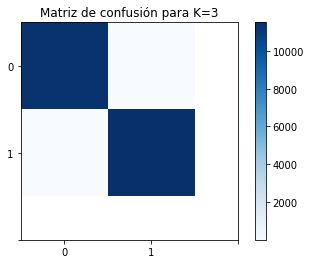

In [517]:
cm= metrics.confusion_matrix(y, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=3")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) #duda aqui
plt.yticks(tick_marks, ['0','1'])

In [518]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", "0")
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", "1")
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[1], average='macro'))


[[11354    10]
 [    7 11507]]
Exactitud:  0.9992569280531515
Kappa    :  0.998513789661652
-------------------------------------
Metricas para la categoría  0
Precisión     :  0.9993838570548367
Recall        :  0.999120028159099
Especificidad :  0.999131718329426
F1-score      :  0.9992519251925193
-------------------------------------
Metricas para la categoría  1
Precisión     :  0.999131718329426
Recall        :  0.9993920444676047
Especificidad :  0.98
F1-score      :  0.999261864443576


---

## 2.2.2 **Protocolos de evaluación**

## 2.2.2.1 **Holdout (Split)**

Vamos a separar el dataset en 2 partes: 70% de los datos se van a utilizar para aprender, 30% para evaluar el modelo de clasificación.
Utilizamos el método *train_test_split* de scikit-learn, que se encarga de hacer el particionamiento aleatorio: 

In [519]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=12345, stratify=y)

In [520]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

16014
6864
16014
6864


In [546]:
numbers

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.131, 0.132, 0.133, 0.134, 0.135,
       0.136, 0.137,

In [521]:
bestAcc = 0
accuracyKNN = ""
acc_train_vec=[]
acc_test_vec=[]
for k in numbers:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    value = metrics.accuracy_score(y_test, y_pred)
    if(value > bestAcc and k>1):
        bestAcc = value
        accuracyKNN = "Mejor Acurracy : " + str(bestAcc) + " con k= " + str(k)

print(acc_train_vec)
print("---")
print(acc_test_vec)
print(k_vec)

[1.0, 0.9992506556762832, 0.9981890845510178, 0.9965030598226552, 0.9945672536530535, 0.9925690021231423, 0.9895091794679656, 0.9865118021730985, 0.9838266516797802, 0.9819532908704883, 0.9782065692519046, 0.974896965155489, 0.9714000249781441]
---
[0.9982517482517482, 0.995920745920746, 0.9938811188811189, 0.9912587412587412, 0.9895104895104895, 0.9873251748251748, 0.9833916083916084, 0.9801864801864801, 0.9772727272727273, 0.9734848484848485, 0.9714452214452215, 0.9692599067599068, 0.9659090909090909]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [522]:
accuracyKNN

'Mejor Acurracy : 0.995920745920746 con k= 3'

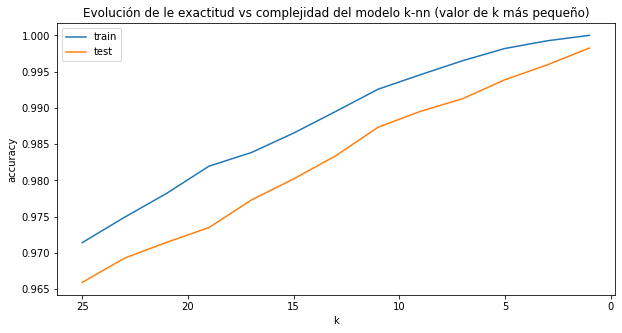

In [523]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(numbers, acc_train_vec)
plt.plot(numbers, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

Aplicando el protocolo de evaluación **HOLDOUT** podemos observar que nuestro **K=3** sigue siendo el mejor, pero disminuyo de **99,92%** a **99,59%**, ya que en este no estamos evaluando con todo el dataframe, sino con una parte de entrenamiento y una de test

## 2.2.2.2 <font color = "GREEN"> **Train of KNN best model (K=3) with HOLDOUT** </font> 

**KNN** con un k=3, ha sido muy bueno hasta el momento. Es hora de evaluarlo con el holdout

In [524]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("K=3>>>  "+ str(metrics.accuracy_score(y_test, y_pred)))

K=3>>>  0.995920745920746


In [525]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", "0")
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", "1")
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))


[[11354    10]
 [    7 11507]]
Exactitud:  0.995920745920746
Kappa    :  0.9918410935461383
-------------------------------------
Metricas para la categoría  0
Precisión     :  0.9961843263868506
Recall        :  0.9955998826635377
Especificidad :  0.999131718329426
F1-score      :  0.9958920187793427
-------------------------------------
Metricas para la categoría  1
Precisión     :  0.9956609777263523
Recall        :  0.9962373371924746
Especificidad :  0.98
F1-score      :  0.9959490740740741


([<matplotlib.axis.YTick at 0x2254dab0f28>,
 <a list of 2 Text yticklabel objects>)

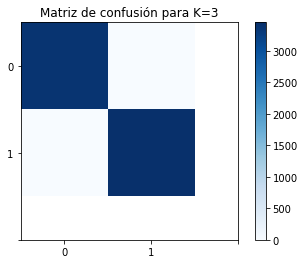

In [545]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=3")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) #duda aqui
plt.yticks(tick_marks, ['0','1'])

---

---

# 2.3 <font color="PURPLE">Modelo Naïve Bayes with HOLDOUT</font>

Usaremos el mismo **HOLDOUT** del **KNN** para poder evaluar ambos modelos conjuntamente

### 2.3.1 Naive Bayes without Var_Smoothing (default)

In [527]:
#X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=12345, stratify=y)

In [528]:
nb = GaussianNB(var_smoothing= 1)
nb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1)

In [529]:
y_pred = nb.predict(X_train)
print("Train : " + str(metrics.accuracy_score(y_train, y_pred)))

Train : 0.9058323966529287


In [530]:
y_pred = nb.predict(X_test)
print("Test : " + str(metrics.accuracy_score(y_test, y_pred)))

Test : 0.9079254079254079


Con el modelo de **Naive Bayes** obtuvimos en el test un **90,79% de precisión** con el **Var_Smoothing** igual a 1

([<matplotlib.axis.YTick at 0x2254788c908>,
 <a list of 2 Text yticklabel objects>)

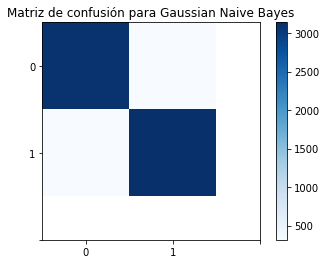

In [531]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para Gaussian Naive Bayes")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) #duda aqui
plt.yticks(tick_marks, ['0','1'])

In [532]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", "0")
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", "1")
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))


[[3094  315]
 [ 317 3138]]
Exactitud:  0.9079254079254079
Kappa    :  0.8158432642298984
-------------------------------------
Metricas para la categoría  0
Precisión     :  0.9070653767223688
Recall        :  0.9075975359342916
Especificidad :  0.9087749782797567
F1-score      :  0.9073313782991203
-------------------------------------
Metricas para la categoría  1
Precisión     :  0.9087749782797567
Recall        :  0.9082489146164978
Especificidad :  0.98
F1-score      :  0.9085118702953098


## 2.3.2 Gaussian NB with Var_Smoothing

### 2.3.2.1 Evaluando los mejores var_smoothing (laplace)

In [533]:
numbers = np.arange(0.1,1,0.01)
numbers

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])

In [534]:
bestAcc = 0
accuracyNB = ""
acc_train_vec=[]
acc_test_vec=[]
for i in numbers:
    nb = GaussianNB(var_smoothing= round(i,2))
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_train)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = nb.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    value = metrics.accuracy_score(y_test, y_pred) 
    if(value > bestAcc):
        bestAcc = value
        acurracyNB = "Mejor Acurracy : " + str(bestAcc) + " con var_smoothing : " + str(round(i,2))
    
print(acc_train_vec)
print("---")
print(acc_test_vec)

[0.9293742974896965, 0.9193830398401399, 0.9145747470962907, 0.9118895966029724, 0.9101411265143, 0.9095791182715124, 0.9088922193081054, 0.9082053203446984, 0.9077682028225302, 0.907393530660672, 0.9072061945797427, 0.9068939677781941, 0.9067690770575746, 0.9065817409766455, 0.9065192956163357, 0.9063319595354066, 0.9063319595354066, 0.9063319595354066, 0.9063319595354066, 0.9062070688147871, 0.9062070688147871, 0.9062070688147871, 0.9061446234544773, 0.9061446234544773, 0.9060821780941676, 0.9060821780941676, 0.9060821780941676, 0.9060197327338578, 0.9059572873735482, 0.9059572873735482, 0.9059572873735482, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9058323966529287, 0.9

In [535]:
acurracyNB

'Mejor Acurracy : 0.9309440559440559 con var_smoothing : 0.1'

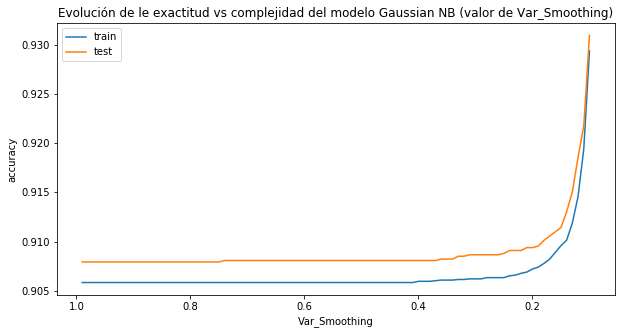

In [536]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(numbers, acc_train_vec)
plt.plot(numbers, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('Var_Smoothing')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo Gaussian NB (valor de Var_Smoothing)')
plt.legend(['train', 'test'])

## Analiis del intervalo 0.1-0.15 en la grafica anterior

En la anterior imagen podemos ver que en el intervalo desde 0.1 hasta intermedio de llegada a 0.2 , existe una curva que implica que el aprendizaje es muy bueno en esa zona, pero luego llega a un punto donde el modelo empieza a perder accuracy, por ende vamos a buscar un poco mas que esta sucediendo en este lado

In [537]:
numbers = np.arange(0.01,0.15,0.001)
numbers

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.131, 0.132, 0.133, 0.134, 0.135,
       0.136, 0.137,

In [538]:
bestAcc = 0
accuracyNB = ""
acc_train_vec=[]
acc_test_vec=[]
for i in numbers:
    nb = GaussianNB(var_smoothing= round(i,2))
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_train)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = nb.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    value = metrics.accuracy_score(y_test, y_pred) 
    if(value > bestAcc):
        bestAcc = value
        acurracyNB = "Mejor Acurracy : " + str(bestAcc) + " con var_smoothing : " + str(round(i,2))
    
print(acc_train_vec)
print("---")
print(acc_test_vec)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9998751092793805, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9988135381541151, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9860122392906208, 0.9779567878106656, 0.9779567878106656, 0.9779567878106656, 0.9779567878106656, 0.9779567878106656, 0.9779567878106656,

In [539]:
acurracyNB

'Mejor Acurracy : 1.0 con var_smoothing : 0.01'

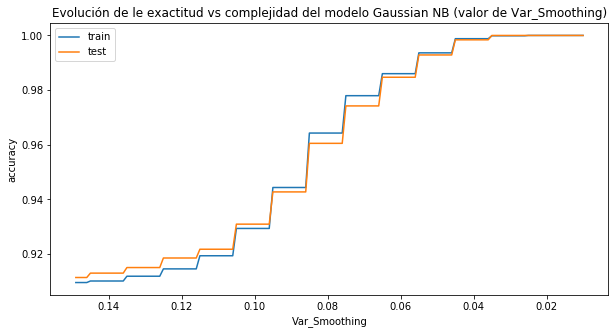

In [540]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(numbers, acc_train_vec)
plt.plot(numbers, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('Var_Smoothing')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo Gaussian NB (valor de Var_Smoothing)')
plt.legend(['train', 'test'])

# <font color="GREEN"> Gaussian NB con Var_Smoothing = 0.04</font>

In [541]:
nb = GaussianNB(var_smoothing= 0.04)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acuraccy = metrics.accuracy_score(y_test, y_pred)

In [542]:
acuraccy

0.9983974358974359

([<matplotlib.axis.YTick at 0x22547cf4f60>,
 <a list of 2 Text yticklabel objects>)

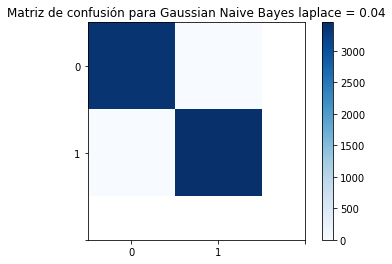

In [543]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para Gaussian Naive Bayes laplace = 0.04")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) #duda aqui
plt.yticks(tick_marks, ['0','1'])

In [544]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", "0")
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", "1")
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))


[[3398   11]
 [   0 3455]]
Exactitud:  0.9983974358974359
Kappa    :  0.9967946589876142
-------------------------------------
Metricas para la categoría  0
Precisión     :  1.0
Recall        :  0.9967732472865943
Especificidad :  0.9968263127524524
F1-score      :  0.9983840164536506
-------------------------------------
Metricas para la categoría  1
Precisión     :  0.9968263127524524
Recall        :  1.0
Especificidad :  0.98
F1-score      :  0.9984106343014015


# 2.4 Comparación

Si comparamos los modelos que estan en **VERDE**, donde utilizamos el **Gaussian NB** con **var_smoothing = 0.04** y el **KNN** con **K=3**, podemos observar lo siguiente:


        En el KNN obtuvimos un accuracy del K=3>>>  0.995920745920746

        En el Gaussian NB obtuvimos un accuracy del 0.9983974358974359 con var_smoothing del 0.04


A simple vista podriamos escoger el **Gaussian NB**, ya que obtuvimos un accuracy bastante elevado, pero , analisemos las otras metricas!

---

## KNN = 3

* **Exactitud**:  0.995920745920746
* **Kappa**    :  0.9918410935461383

Metricas para la categoría  0

* **Precisión**     :  0.9961843263868506
* **Recall**        :  0.9955998826635377
* **Especificidad** :  0.999131718329426
* **F1-score**      :  0.9958920187793427

Metricas para la categoría  1

* **Precisión**     :  0.9956609777263523
* **Recall**        :  0.9962373371924746
* **Especificidad** :  0.98
* **F1-score**      :  0.9959490740740741

---

## Gaussian NB var_Smoothing = 0.04

* **Exactitud**:  0.9983974358974359
* **Kappa**    :  0.9967946589876142

Metricas para la categoría  0

* **Precisión**     :  1.0
* **Recall**        :  0.9967732472865943
* **Especificidad** :  0.9968263127524524
* **F1-score**      :  0.9983840164536506

Metricas para la categoría  1

* **Precisión**     :  0.9968263127524524
* **Recall**        :  1.0
* **Especificidad** :  0.98
* **F1-score**      :  0.9984106343014015

## <font color="GREEN">Conclusión</font>

**Gaussian NB** es el modelo que deberiamos escoger, ya que a comparación del KNN , nos ofrece :

* Un accuracy mas elevado
* Una tasa de recall, el cual implica el numero de **positivos reales** que puede identificar por cada categoria, mas elevado